# Analysing and Plotting the output of our C++ (Extended) Kalman Filter

Doing so in C++ would be hard and annoying

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse, Circle

In [156]:
data = np.genfromtxt("./recorded_sensor_data/field_data_2/auto/kf_out.csv", delimiter=",", dtype=np.float64)

x = data[:,0]
y = data[:,1]
yaw = data[:,2]
dx = data[:,3]
dy = data[:,4]
dyaw = data[:,5]
ddx = data[:,6]
ddy = data[:,7]
ddyaw = data[:,8]

cov_x = data[:,9]
cov_y = data[:,19]
cov_yaw = data[:,29]
cov_dx = data[:,39]
cov_dy = data[:,49]
cov_dyaw = data[:,59]
cov_ddx = data[:,69]
cov_ddy = data[:,79]
cov_ddyaw = data[:,89]

In [157]:
print(data.shape)
print(x)
print(y)

(4130, 90)
[ 0.00000e+00 -7.81250e-07 -3.06924e-06 ... -8.50251e+01 -8.56353e+01
 -8.67451e+01]
[ 0.00000e+00  0.00000e+00  2.89857e-07 ... -1.18585e+02 -1.19081e+02
 -1.19486e+02]


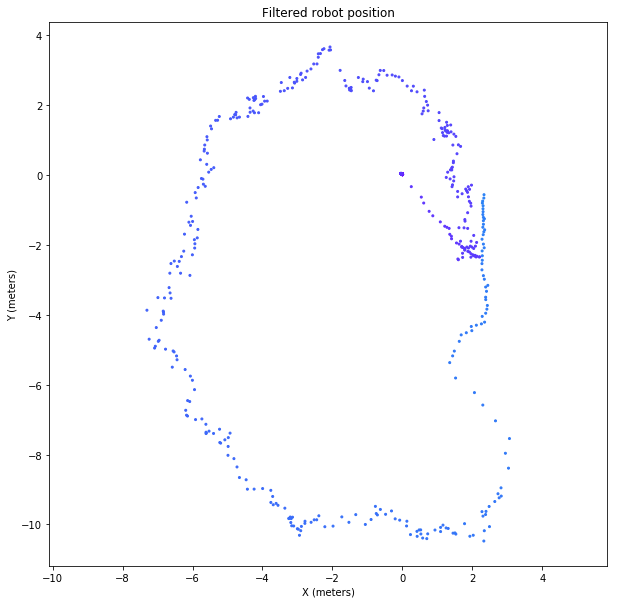

In [158]:
T_begin = 0
T_end = 700

plt.figure(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, data.shape[0]))
plt.scatter(x[T_begin:T_end],y[T_begin:T_end], s=4, color=colors[T_begin:T_end])
plt.ylabel("Y (meters)")
plt.xlabel("X (meters)")
plt.title("Filtered robot position")
plt.axis("equal")
plt.show()

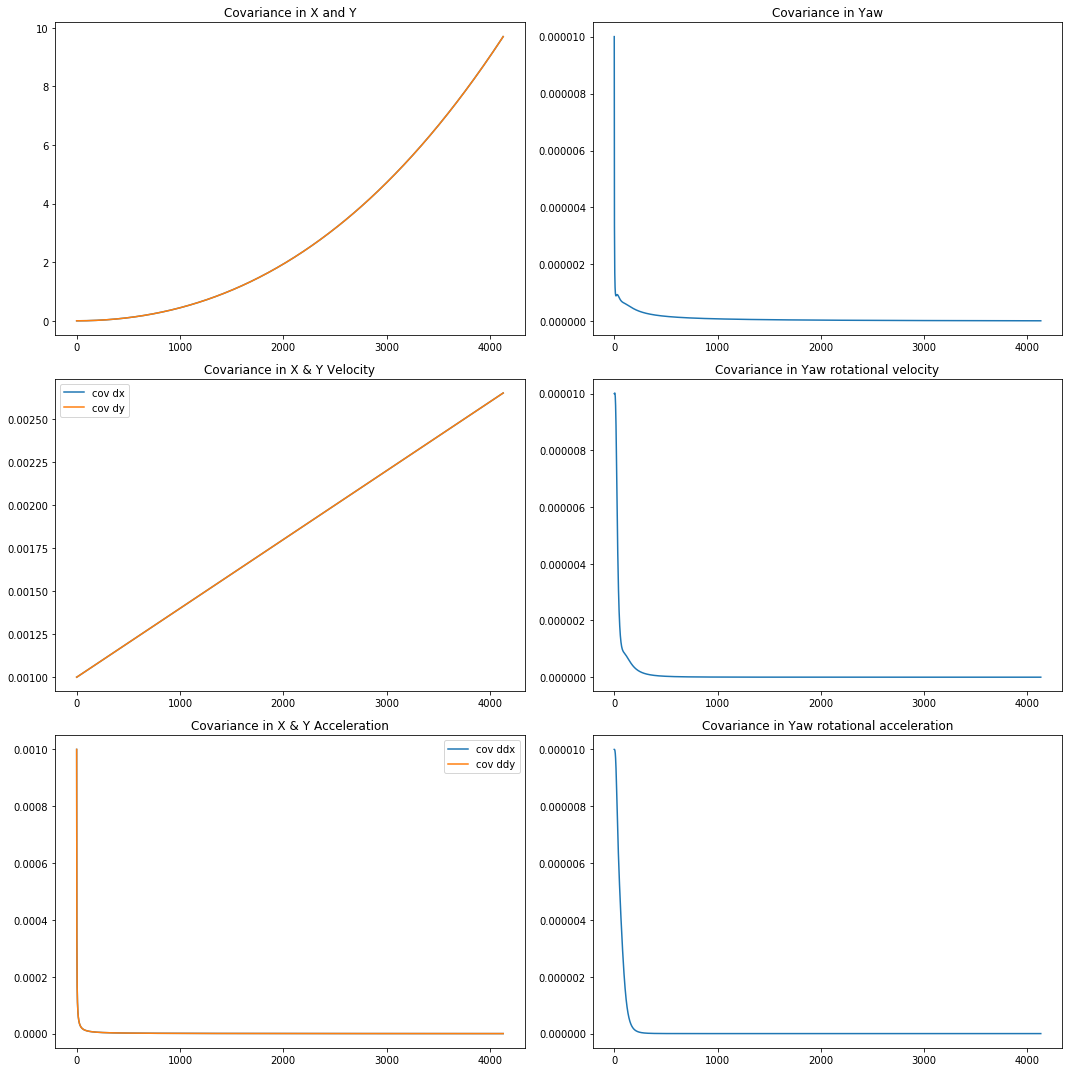

In [159]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
ax[0,0].plot(cov_x, label='cov x')
ax[0,0].plot(cov_y, label='cov y')
ax[0,0].set_title("Covariance in X and Y")

ax[1,0].plot(cov_dx, label='cov dx')
ax[1,0].plot(cov_dy, label='cov dy')
ax[1,0].set_title("Covariance in X & Y Velocity")
ax[1,0].legend()

ax[2,0].plot(cov_ddx, label='cov ddx')
ax[2,0].plot(cov_ddy, label='cov ddy')
ax[2,0].set_title("Covariance in X & Y Acceleration")
ax[2,0].legend()

ax[0,1].plot(cov_yaw, label='cov yaw')
ax[0,1].set_title("Covariance in Yaw")

ax[1,1].plot(cov_dyaw, label='cov dyaw')
ax[1,1].set_title("Covariance in Yaw rotational velocity")

ax[2,1].plot(cov_ddyaw, label='cov ddyaw')
ax[2,1].set_title("Covariance in Yaw rotational acceleration")

plt.tight_layout()
plt.show()